## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

ALSO SEE FOR HELP

https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
https://www.nonlinear.com/support/progenesis/comet/faq/v2.0/pca.aspx

https://plotly.com/python/pca-visualization/

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


https://plotly.com/python/pca-visualization/

In [131]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import plotly.express as px
# !pip install pca
# from pca import pca

In [59]:
# load dataset
wine = load_wine()
y=wine.target
df = pd.DataFrame(wine.data, columns=wine.feature_names)
n_components = 2
df.head(2)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [60]:
df.shape

(178, 13)

In [61]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [63]:
# df.describe

### Check for null/ missing data 

In [64]:
total = df.isnull().sum().sort_values(ascending=False)
total

proline                         0
od280/od315_of_diluted_wines    0
hue                             0
color_intensity                 0
proanthocyanins                 0
nonflavanoid_phenols            0
flavanoids                      0
total_phenols                   0
magnesium                       0
alcalinity_of_ash               0
ash                             0
malic_acid                      0
alcohol                         0
dtype: int64

### Scale data

In [65]:
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df))
#    reassign labels
df_scaled.columns = df.columns
df_scaled.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


### PCA

In [66]:
# pca = PCA()
# components = pca.fit_transform(df_scaled)

### PCA plot

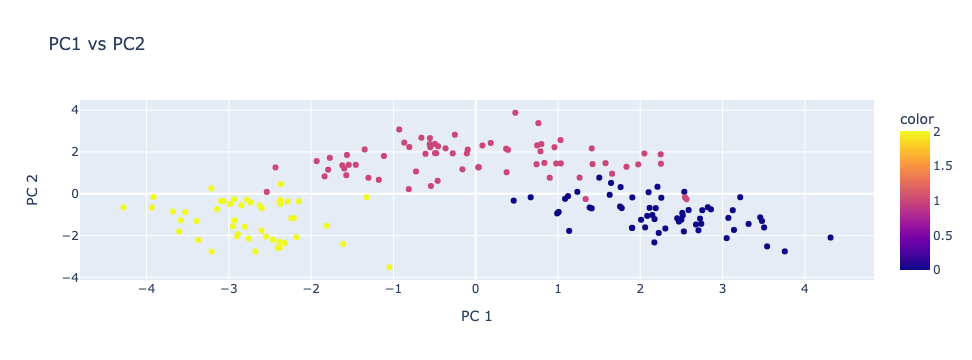

In [67]:
import plotly.express as px
from sklearn.decomposition import PCA

# df = px.data.iris()
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# df = px.df_scaled

X = df_scaled
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# total_var = pca.explained_variance_ratio_.sum() * 100


fig = px.scatter(
    components, x=0, y=1, color=y,
#     title=f'Total Explained Variance: {total_var:.2f}%',
    title=f'PC1 vs PC2',
    labels={'0': 'PC 1', '1': 'PC 2'}
)

fig.show()

### Trying this from 
https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space


In [ ]:
# plot before and after 
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [132]:
print("PC1/ PC2 :", pca.explained_variance_ratio_)

PC1/ PC2 : [0.36198848 0.1920749 ]


## Biplots plot

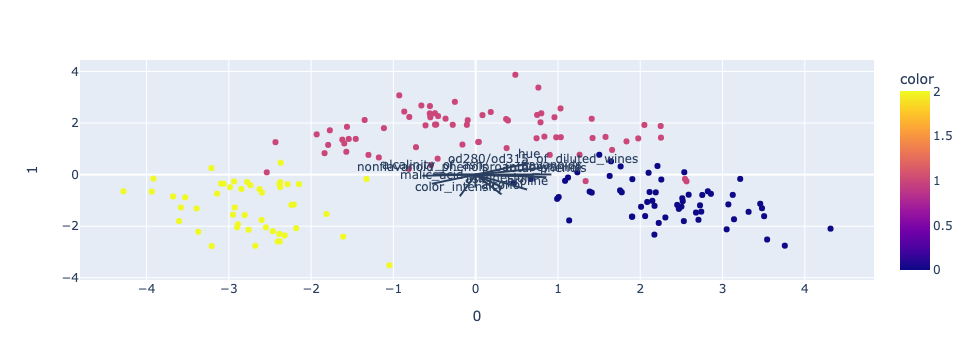

In [148]:
# import plotly.express as px
# from sklearn.decomposition import PCA
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler

# df = px.data.iris()
# features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# THIS IS A BIPLOT (PCA biplot = PCA score plot + loading plot)

X = df_scaled
pca = PCA(n_components=2)
components = pca.fit_transform(X)


features = df.columns
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=y)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [134]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

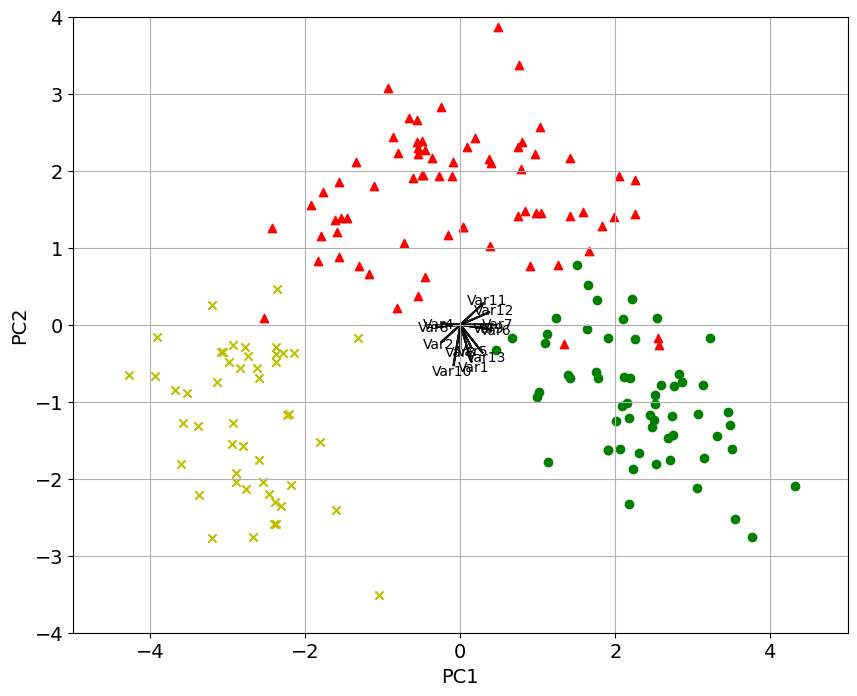

In [136]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(components[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

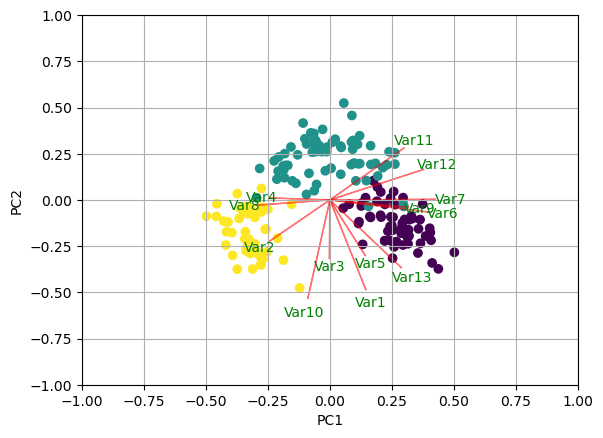

In [137]:
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # In general, it's a good idea to scale the data prior to PCA.
# scaler = StandardScaler()
# scaler.fit(X)
# X=scaler.transform(X)    
# pca = PCA()
# x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(components[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

## Loading plot

In [126]:
# loadings
df_loading = pd.DataFrame(loadings, columns=('PC1','PC2'), index = df.columns)
df_loading.head()

,PC1,PC2
alcohol,0.313977,-0.766413
malic_acid,-0.533385,-0.356434
ash,-0.004462,-0.500855
alcalinity_of_ash,-0.520622,0.016782
magnesium,0.308892,-0.474812


In [127]:
df_loading = df_loading.sort_values(by = 'PC1', ascending = False)

df_loading.head()

,PC1,PC2
flavanoids,0.920058,0.005324
total_phenols,0.858552,-0.103064
od280/od315_of_diluted_wines,0.818321,0.260667
proanthocyanins,0.681840,-0.062279
hue,0.645478,0.442487


In [128]:
df_loading = df_loading.T.abs()

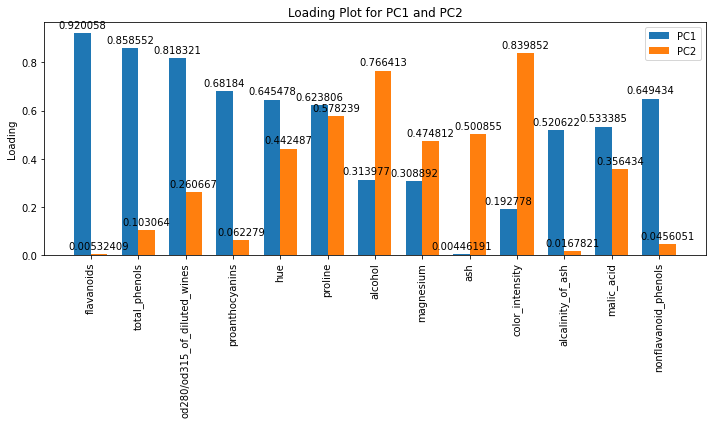

In [130]:
labels = df_loading.columns
PC1 = df_loading.loc['PC1']
PC2 = df_loading.loc['PC2']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10, 6))
rects1 = ax.bar(x - width/2, PC1, width, label='PC1')
rects2 = ax.bar(x + width/2, PC2, width, label='PC2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Loading')
ax.set_title('Loading Plot for PC1 and PC2')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

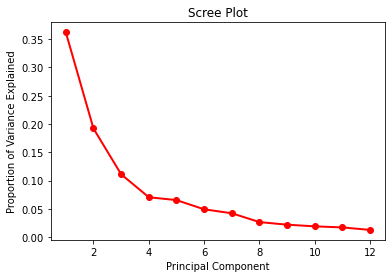

In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

pca = PCA(n_components=12)
components = pca.fit_transform(X)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

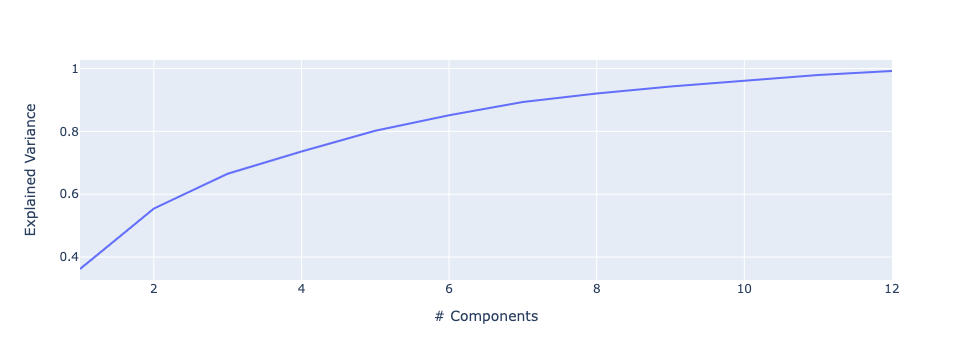

In [74]:
# import plotly.express as px
# import numpy as np
# import pandas as pd
# from sklearn.decomposition import PCA
# from sklearn.datasets import load_diabetes

# boston = load_diabetes()
# df = pd.DataFrame(boston.data, columns=boston.feature_names)

# pca = PCA()
# pca.fit(df)

pca = PCA(n_components=12)
components = pca.fit_transform(X)

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.line(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

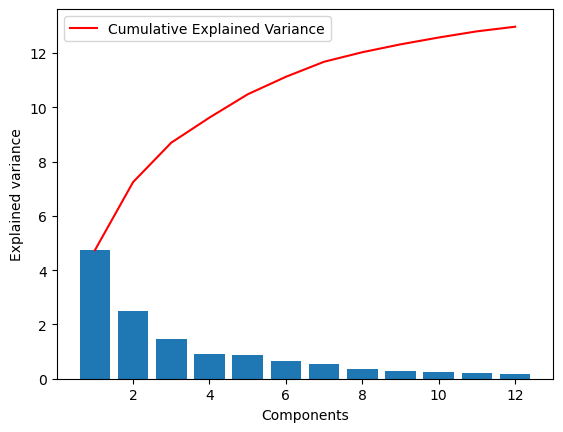

In [142]:
# pca = PCA(n_components=12)
# components = pca.fit_transform(X)

# plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
# plt.ylabel('Explained variance')
# plt.xlabel('Components')
# plt.plot(range(1,len(pca.explained_variance_ )+1),
#          np.cumsum(pca.explained_variance_),
#          c='red',
#          label="Cumulative Explained Variance")
# plt.legend(loc='upper left')

In [76]:
X = df_scaled
pca = PCA(n_components=4)
components = pca.fit_transform(X)

In [78]:
pca4_df = pd.DataFrame(components)

In [80]:
pca4_df.head()

,0,1,2,3
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766


In [81]:
pca4_df.shape

(178, 4)

In [82]:
df.shape

(178, 13)

In [84]:
pca4_df.to_csv('data/pca4_wine.csv')

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.

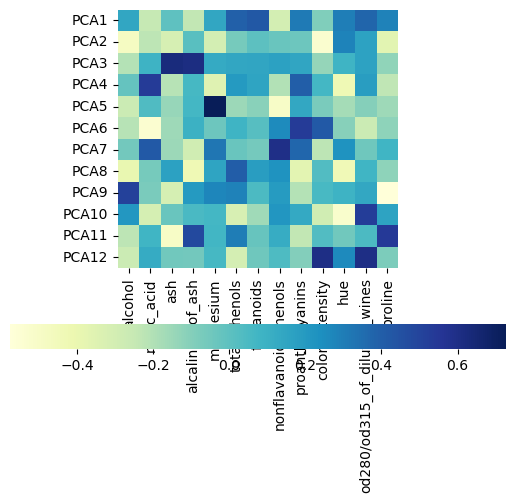

In [146]:
# import seaborn
import seaborn as sns
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")